In [1]:
#Standard imported libraries, and some extras just in case...
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import sklearn.metrics as sm
from sklearn import datasets


DATA: PART OF SCIKIT-LEARN'S BUILT-IN TOY DATASETS, 'WINE'
Classes: 3 [0,1,2], Samples per class: [59,71,48], Dimensionality: 13, Features: real, positive
Number of Instances: 178 (50 in each of three classes), Number of Attributes: 13 numeric, predictive attributes and the class
Attribute Information: Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline
This is a copy of UCI ML Wine recognition datasets. https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.
Original Owners: Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.
Citation: Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [2]:
#Let's import the data from sklearn
from sklearn.datasets import load_wine
wine=load_wine()

#Convert to pandas dataframe
df=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [19]:
#Create a correlation matrix, just to explore
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='PuOr_r', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
malic_acid,0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ash,0.21,0.16,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
alcalinity_of_ash,-0.31,0.29,0.44,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
magnesium,0.27,-0.05,0.29,-0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
total_phenols,0.29,-0.34,0.13,-0.32,0.21,nan,nan,nan,nan,nan,nan,nan,nan,nan
flavanoids,0.24,-0.41,0.12,-0.35,0.20,0.86,nan,nan,nan,nan,nan,nan,nan,nan
nonflavanoid_phenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,nan,nan,nan,nan,nan,nan,nan
proanthocyanins,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,nan,nan,nan,nan,nan,nan
color_intensity,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,nan,nan,nan,nan,nan


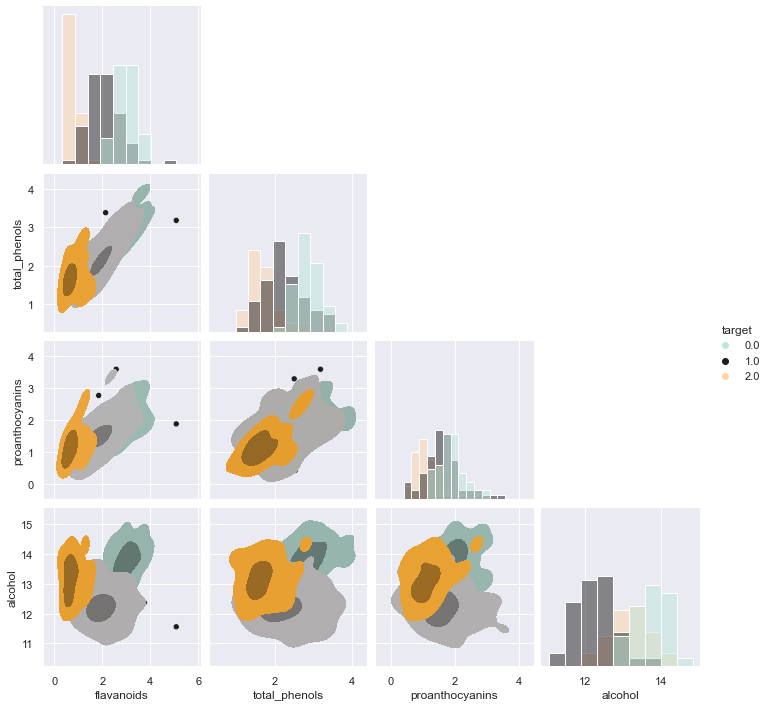

In [4]:
#Create a pairplot, still exploring
g = sns.pairplot(df[['flavanoids', 'total_phenols', 'proanthocyanins', 'alcohol', 'target']], 
    hue="target",           #Choose from variables
    diag_kind="hist",       #Choose from hist, kde, 
    palette='icefire',      #Choose from cubehelix, YlOrBr, icefire
    corner=True,            #Choose from True or False
    )
g.map_lower(sns.kdeplot, 
    levels=3, 
    color=".2",
    shade=True,
    thresh=0.05,
    )  

In [5]:
#Now we start getting ready for PCA
X = df.iloc[:,0:14]
target = df['target'].to_numpy()
X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [6]:
#Could've done this earlier, but now is as good a time as any
#Remaning columns
X = X.rename(columns={
    'alcohol': 'ALC',
    'malic_acid' : 'MAL-A',
    'ash' : 'ASH',
    'alcalinity_of_ash' : 'ALK-ASH',
    'magnesium' : 'MAG',
    'total_phenols' : 'T-PHE',
    'flavanoids' : 'FLAV',
    'nonflavanoid_phenols' : 'NONF-PH', 
    'proanthocyanins' : 'PROA',
    'color_intensity' : 'COLOR',
    'hue' : 'HUE',
    'od280/od315_of_diluted_wines' : 'DILU', 
    'proline' : 'PROL',
    'target' : 'TARGET',
    })
#After running this a few times, wanted to drop some of the features that explain
#most of the variance on their own, so we could get a more interesting scree plot.
X2=X.drop([
    'PROL', 
    'MAG', 
    'ALK-ASH', 
    #'COLOR', 
    #'TARGET'       #Uncomment this for unsupervised learning. Comment out for supervised learning.
    ], axis=1)
X2.head()

,ALC,MAL-A,ASH,T-PHE,FLAV,NONF-PH,PROA,COLOR,HUE,DILU,TARGET
0,14.23,1.71,2.43,2.80,3.06,0.28,2.29,5.64,1.04,3.92,0.0
1,13.20,1.78,2.14,2.65,2.76,0.26,1.28,4.38,1.05,3.40,0.0
2,13.16,2.36,2.67,2.80,3.24,0.30,2.81,5.68,1.03,3.17,0.0
3,14.37,1.95,2.50,3.85,3.49,0.24,2.18,7.80,0.86,3.45,0.0
4,13.24,2.59,2.87,2.80,2.69,0.39,1.82,4.32,1.04,2.93,0.0


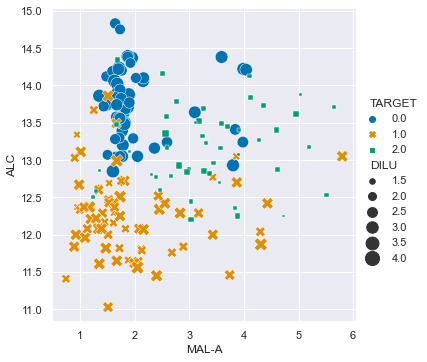

In [7]:
sns.relplot(x="MAL-A", y="ALC", size='DILU', sizes=(15, 200), hue='TARGET', style='TARGET', palette='colorblind', data=X2);
#Choose from cubehelix, YlOrBr, icefire, colorblind, and many others. See https://seaborn.pydata.org/tutorial/color_palettes.html

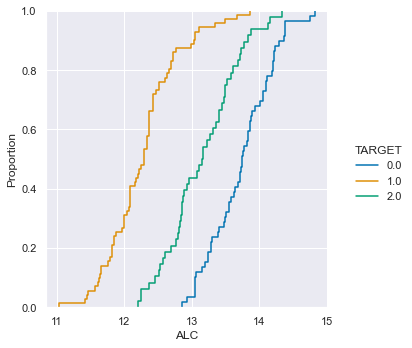

In [8]:
sns.displot(
    x="ALC",
    #binwidth=.5,
    #bins=10, 
    hue='TARGET',
    #element='step', 
    #multiple='dodge',      #Choose from stack, dodge
    #stat='probability',     #When subsets have unequal obs, choose from density, probability
    #common_norm=False,      #Normalizes each subset independently
    palette='colorblind',       #Choose from cubehelix, YlOrBr, icefire 
    kind='ecdf',             #Choose from kde, ecdf
    #multiple='stack',
    #bw_adjust=.25,
    #fill=True,
    data=X2);

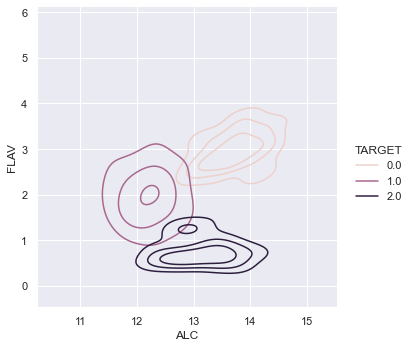

In [9]:
sns.displot(
    x="ALC",
    y='FLAV',
    hue='TARGET',
    kind='kde',             #Choose from kde, ecdf
    thresh=.2,
    levels=4,
    data=X2);

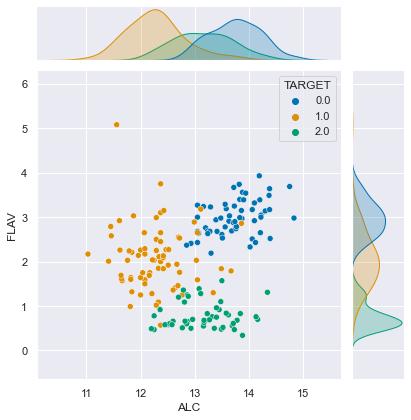

In [10]:
sns.jointplot(
    x="ALC",
    y='FLAV',
    hue='TARGET',
    palette = 'colorblind',
    #kind='kde',             #Choose from kde, ecdf
    #thresh=.2,
    #levels=4,
    data=X2);

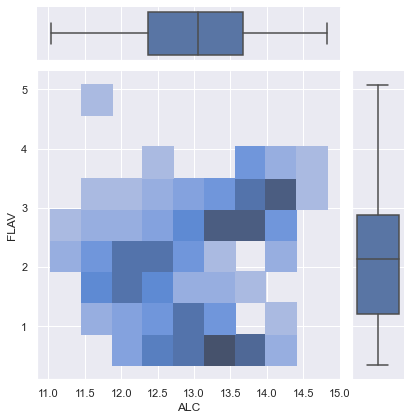

In [11]:
g = sns.JointGrid(x="ALC", y='FLAV', data=X2);
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

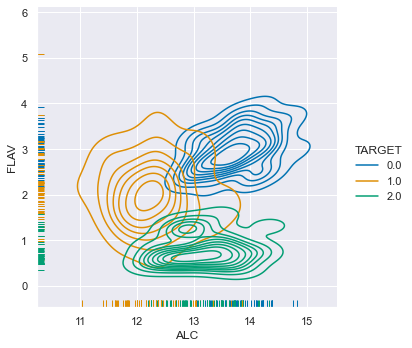

In [12]:
sns.displot(
    x="ALC",
    y='FLAV',
    hue='TARGET',
    palette = 'colorblind',
    kind='kde',             #Choose from kde, ecdf
    rug=True,
    data=X2);

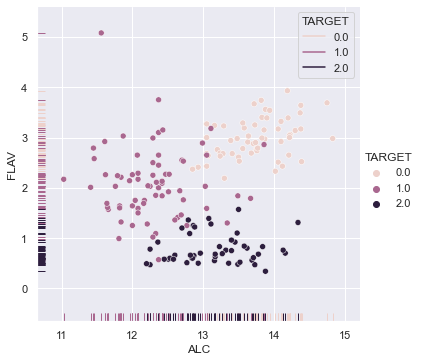

In [13]:
sns.relplot(data=X2, x="ALC", y='FLAV', hue='TARGET')
sns.rugplot(data=X2, x="ALC", y='FLAV', hue='TARGET');

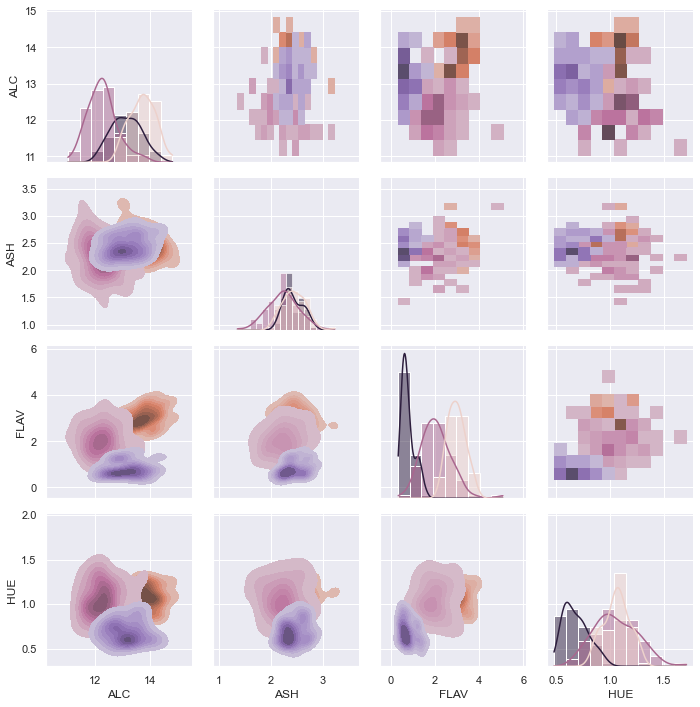

In [14]:
g = sns.PairGrid(X2[['ALC', 'ASH', 'FLAV', 'HUE', 'TARGET']], hue='TARGET')
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [15]:
#TARGET COLOR ALC 12.5, 13. 13.7, 14.1
X2 = X2.assign(ash_cat = pd.cut(X2.ASH,bins=[0,2.2,2.4,2.6,3.3],labels=['1st','2nd','3rd','4th']))
X2 = X2.assign(color_cat = pd.cut(X2.COLOR,bins=[0,3.2,4.7,6.2,13],labels=['1st','2nd','3rd','4th']))
#X2 = X2.drop('alc_cat', axis=1)
#X2.isna().sum()
X2.head()

,ALC,MAL-A,ASH,T-PHE,FLAV,NONF-PH,PROA,COLOR,HUE,DILU,TARGET,ash_cat,color_cat
0,14.23,1.71,2.43,2.80,3.06,0.28,2.29,5.64,1.04,3.92,0.0,3rd,3rd
1,13.20,1.78,2.14,2.65,2.76,0.26,1.28,4.38,1.05,3.40,0.0,1st,2nd
2,13.16,2.36,2.67,2.80,3.24,0.30,2.81,5.68,1.03,3.17,0.0,4th,3rd
3,14.37,1.95,2.50,3.85,3.49,0.24,2.18,7.80,0.86,3.45,0.0,3rd,4th
4,13.24,2.59,2.87,2.80,2.69,0.39,1.82,4.32,1.04,2.93,0.0,4th,2nd


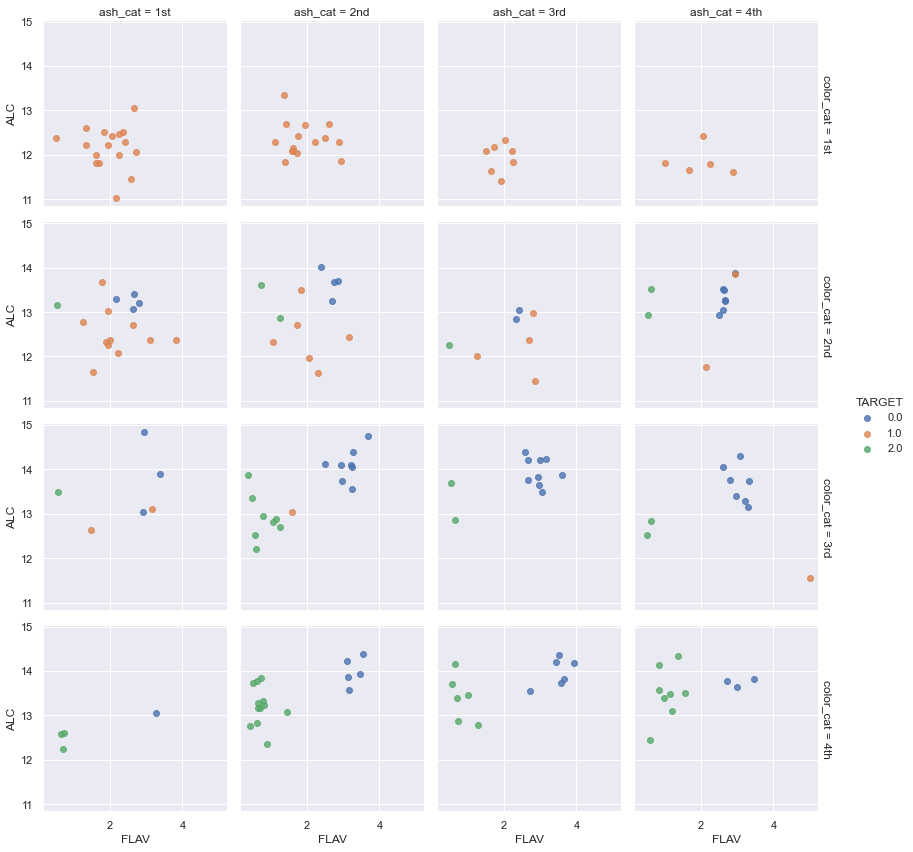

In [16]:
g = sns.FacetGrid(X2, row="color_cat", col="ash_cat", hue='TARGET', margin_titles=True)
g.map(sns.regplot, "FLAV", "ALC", fit_reg=False, x_jitter=.1)
g.add_legend()

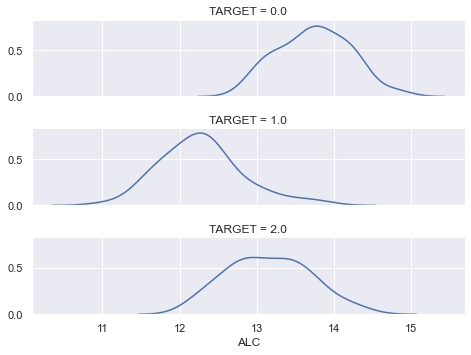

In [17]:
g = sns.FacetGrid(X2, row="TARGET", height=1.7, aspect=4,)
g.map(sns.kdeplot, "ALC")